In [67]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.inspection import permutation_importance

*Charging data set*


In [4]:
df=pd.read_parquet('../data/interim/Breastnooutliers.parquet')

In [5]:
df.dtypes

perimeter_se               float64
radius_worst               float64
concave points_mean        float64
smoothness_mean            float64
area_mean                  float64
concavity_se               float64
texture_mean               float64
concavity_worst            float64
smoothness_se              float64
concave points_se          float64
area_worst                 float64
compactness_mean           float64
radius_mean                float64
area_se                    float64
concave points_worst       float64
fractal_dimension_worst    float64
perimeter_worst            float64
texture_se                 float64
fractal_dimension_mean     float64
texture_worst              float64
smoothness_worst           float64
concavity_mean             float64
symmetry_mean              float64
symmetry_worst             float64
diagnosis                  float64
fractal_dimension_se       float64
perimeter_mean             float64
compactness_worst          float64
symmetry_se         

*Arranging the "diagnosis" data type*

In [7]:
df['diagnosis']=df["diagnosis"].astype("category")

In [8]:
df.dtypes

perimeter_se                float64
radius_worst                float64
concave points_mean         float64
smoothness_mean             float64
area_mean                   float64
concavity_se                float64
texture_mean                float64
concavity_worst             float64
smoothness_se               float64
concave points_se           float64
area_worst                  float64
compactness_mean            float64
radius_mean                 float64
area_se                     float64
concave points_worst        float64
fractal_dimension_worst     float64
perimeter_worst             float64
texture_se                  float64
fractal_dimension_mean      float64
texture_worst               float64
smoothness_worst            float64
concavity_mean              float64
symmetry_mean               float64
symmetry_worst              float64
diagnosis                  category
fractal_dimension_se        float64
perimeter_mean              float64
compactness_worst           

In [10]:
df.info()

<bound method DataFrame.info of      perimeter_se  radius_worst  concave points_mean  smoothness_mean  \
0          2225.0         13.28              0.01162          0.07561   
1          2362.0         17.52              0.09429          0.10480   
2          2346.0         14.19              0.02548          0.08794   
3          1429.0         10.75              0.02292          0.08481   
4          2406.0         15.49              0.09353          0.12730   
..            ...           ...                  ...              ...   
564           NaN           NaN                  NaN          0.11490   
565        3061.0         21.08              0.08824          0.10360   
566        1344.0         17.80              0.03263          0.09057   
567        2041.0         11.92              0.00000          0.07449   
568        2974.0         16.01              0.06759          0.11620   

     area_mean  concavity_se  texture_mean  concavity_worst  smoothness_se  \
0        421.

*Calculating nulls porcentaje*

In [11]:
missing = df.isnull().sum()
missing[missing>0]*100/len(df)

perimeter_se                6.151142
radius_worst                4.920914
concave points_mean         3.690685
smoothness_mean             4.920914
area_mean                   4.393673
concavity_se                4.569420
texture_mean                1.230228
concavity_worst             8.260105
smoothness_se               5.272408
concave points_se           3.690685
area_worst                  6.151142
compactness_mean            5.975395
radius_mean                 8.084359
area_se                    11.775044
concave points_worst        5.272408
fractal_dimension_worst     5.623902
perimeter_worst             2.636204
texture_se                  0.702988
fractal_dimension_mean      3.866432
texture_worst               0.878735
smoothness_worst            8.260105
concavity_mean              7.557118
symmetry_mean               9.841828
symmetry_worst             12.653779
fractal_dimension_se        5.096661
perimeter_mean              2.284710
compactness_worst          10.369069
s

*Because of the first experiment we are going to test with dropping the Nan rows*

In [65]:
dfprueba1=df.dropna()
dfprueba1

,perimeter_se,radius_worst,concave points_mean,smoothness_mean,area_mean,concavity_se,texture_mean,concavity_worst,smoothness_se,concave points_se,...,concavity_mean,symmetry_mean,symmetry_worst,diagnosis,fractal_dimension_se,perimeter_mean,compactness_worst,symmetry_se,compactness_se,radius_se
0,2225.00,13.28,0.011620,0.07561,421.0,0.005949,17.07,0.03046,0.006583,0.006296,...,0.008306,0.1671,0.2731,0.0,0.002668,73.70,0.06476,0.02216,0.006991,0.3534
2,2346.00,14.19,0.025480,0.08794,504.1,0.031370,13.37,0.17690,0.006494,0.010690,...,0.040520,0.1601,0.2564,0.0,0.004392,82.29,0.22080,0.01731,0.027680,0.3265
6,3.07,17.39,0.091940,0.10260,815.8,0.080790,19.51,0.58970,0.009197,0.022150,...,0.223600,0.2151,0.3318,1.0,0.006355,109.80,0.44620,0.02773,0.054700,0.3147
9,1737.00,15.11,0.020880,0.08743,593.7,0.005254,16.21,0.05285,0.005638,0.006042,...,0.015020,0.1424,0.2362,0.0,0.002087,88.52,0.10080,0.01544,0.007939,0.2543
10,2642.00,15.65,0.045620,0.10340,477.4,0.037630,26.86,0.44250,0.009098,0.013210,...,0.108500,0.1943,0.3215,1.0,0.005672,81.15,0.47060,0.01878,0.038450,0.4053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,1047.00,13.34,0.006423,0.08511,481.6,0.002620,16.85,0.01938,0.004928,0.003390,...,0.004473,0.1215,0.1917,0.0,0.001344,79.19,0.04953,0.01393,0.003012,0.1716
557,1164.00,12.32,0.027550,0.09834,388.0,0.012820,13.04,0.12750,0.006472,0.008849,...,0.032650,0.1769,0.2733,0.0,0.002817,72.23,0.15070,0.01692,0.011220,0.1904
560,1822.00,12.84,0.056690,0.12270,371.1,0.025950,21.35,0.40230,0.008064,0.010370,...,0.104400,0.1895,0.2964,1.0,0.003040,71.90,0.26980,0.01357,0.017640,0.2366
562,1.40,14.69,0.011170,0.07517,562.1,0.007508,28.21,0.07934,0.004942,0.005179,...,0.012710,0.1421,0.2694,0.0,0.001684,85.89,0.14570,0.01442,0.012030,0.1689


In [18]:
dfprueba1.diagnosis.value_counts()

0.0    122
1.0     44
Name: diagnosis, dtype: int64

In [19]:
# se obtiene la matriz de correlacion de pearson. Observe que se toman
# únicamente variables numericas
from sklearn import preprocessing
matriz_correlacion = df.corr(method='pearson')
matriz_correlacion


,perimeter_se,radius_worst,concave points_mean,smoothness_mean,area_mean,concavity_se,texture_mean,concavity_worst,smoothness_se,concave points_se,...,smoothness_worst,concavity_mean,symmetry_mean,symmetry_worst,fractal_dimension_se,perimeter_mean,compactness_worst,symmetry_se,compactness_se,radius_se
perimeter_se,1.000000,0.524337,0.495008,0.184405,0.509999,0.307673,0.226600,0.343922,0.142672,0.425452,...,0.135139,0.460973,0.244679,0.160891,0.209133,0.500105,0.269208,0.140970,0.295469,0.717645
radius_worst,0.524337,1.000000,0.799501,0.200069,0.965596,0.377396,0.346533,0.606729,-0.173252,0.415300,...,0.251119,0.695153,0.204884,0.277841,0.106400,0.967903,0.515875,-0.193747,0.304670,0.695040
concave points_mean,0.495008,0.799501,1.000000,0.538289,0.761708,0.595738,0.273800,0.763955,0.054489,0.659178,...,0.449397,0.923263,0.432751,0.381447,0.326864,0.811449,0.691760,-0.071877,0.531323,0.683787
smoothness_mean,0.184405,0.200069,0.538289,1.000000,0.114673,0.300073,0.008065,0.405905,0.308995,0.413996,...,0.786683,0.480735,0.521696,0.434275,0.368499,0.166811,0.458046,0.101592,0.357424,0.266336
area_mean,0.509999,0.965596,0.761708,0.114673,1.000000,0.346918,0.319349,0.522620,-0.182225,0.388173,...,0.134855,0.642486,0.149720,0.187839,0.030141,0.990396,0.425026,-0.187882,0.275629,0.652329
concavity_se,0.307673,0.377396,0.595738,0.300073,0.346918,1.000000,0.256916,0.744268,0.277275,0.747200,...,0.254727,0.736368,0.343672,0.200733,0.616118,0.392719,0.655018,0.128772,0.843072,0.393805
texture_mean,0.226600,0.346533,0.273800,0.008065,0.319349,0.256916,1.000000,0.297956,0.085094,0.189300,...,0.081360,0.300104,0.094490,0.100982,0.141677,0.317838,0.226002,0.013950,0.239186,0.335931
concavity_worst,0.343922,0.606729,0.763955,0.405905,0.522620,0.744268,0.297956,1.000000,0.029953,0.575607,...,0.505109,0.898206,0.421235,0.463792,0.405354,0.585639,0.895942,-0.142690,0.661973,0.438353
smoothness_se,0.142672,-0.173252,0.054489,0.308995,-0.182225,0.277275,0.085094,0.029953,1.000000,0.324553,...,0.324781,0.073572,0.207532,-0.045504,0.397705,-0.206328,0.013861,0.404393,0.272406,0.166398
concave points_se,0.425452,0.415300,0.659178,0.413996,0.388173,0.747200,0.189300,0.575607,0.324553,1.000000,...,0.287176,0.682650,0.345230,0.146041,0.528281,0.428684,0.563419,0.165163,0.709280,0.515691


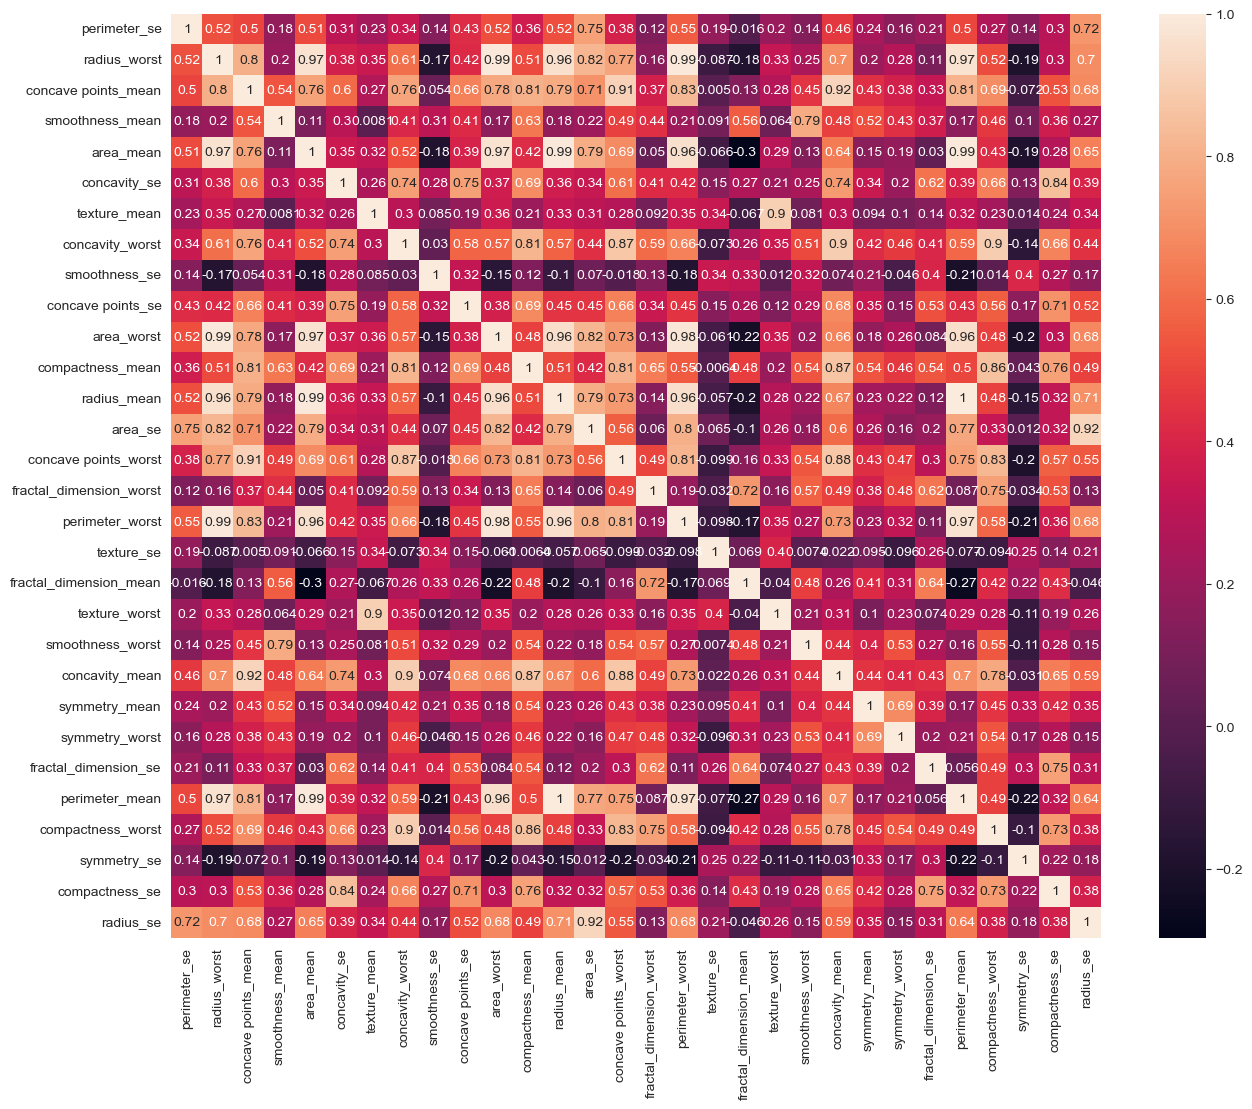

In [29]:
# se construye un mapa de calor a partir de la matriz de correlación
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(matriz_correlacion, annot=True);

*Splitting the data set into Target and explicatives( By now we are just going to split the data set into test and and training, and not with the validation, becouse of the amount of data that remains(166))*

In [42]:
# se toman todas las columnas menos sobreviviente, que es la clase
X = dfprueba1.drop('diagnosis', axis=1)
# se selecciona la columna de la clase
y = dfprueba1['diagnosis']
# Split dataset into training set and test set
#random_state generador de numero aleatorios (semilla usada por el generador)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle=True) # 70% training and 30% test

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split function

tipificado = StandardScaler().fit(X_train)
standardized_X = tipificado.transform(X_train)
standardized_X_test = tipificado.transform(X_test)

In [44]:
dfprueba1.columns

Index(['perimeter_se', 'radius_worst', 'concave points_mean',
       'smoothness_mean', 'area_mean', 'concavity_se', 'texture_mean',
       'concavity_worst', 'smoothness_se', 'concave points_se', 'area_worst',
       'compactness_mean', 'radius_mean', 'area_se', 'concave points_worst',
       'fractal_dimension_worst', 'perimeter_worst', 'texture_se',
       'fractal_dimension_mean', 'texture_worst', 'smoothness_worst',
       'concavity_mean', 'symmetry_mean', 'symmetry_worst', 'diagnosis',
       'fractal_dimension_se', 'perimeter_mean', 'compactness_worst',
       'symmetry_se', 'compactness_se', 'radius_se'],
      dtype='object')

*Testing the more relevant variables*

In [45]:
from sklearn.feature_selection import SelectKBest

best=SelectKBest(k=8)
X_new= best.fit_transform(X,y)
selected = best.get_support(indices=True)
caracteristicasUsadas =X.columns[selected]
print(caracteristicasUsadas)

Index(['radius_worst', 'concave points_mean', 'area_mean', 'area_worst',
       'concave points_worst', 'perimeter_worst', 'concavity_mean',
       'perimeter_mean'],
      dtype='object')


*Testing a diferent kinds of models in order to find the best one*

In [47]:
seed =2
models = []

#logistic Regression
models.append(('LR', LogisticRegression(solver='liblinear')))

# Decision Tree classifier
models.append(('CART', DecisionTreeClassifier()))

# Naïve Bayes
models.append(('NB', GaussianNB()))
# SVM
models.append(('SVM', SVC(C=1.0, kernel='rbf', max_iter=1000, tol=1e-3)))
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	# Kfol cross validation for model selection
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	#X train , y train
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = f"({name}, {cv_results.mean()}, {cv_results.std()}"
	print(msg)

(LR, 0.8583333333333332, 0.18276426832884424
(CART, 0.7383333333333333, 0.24743686063317247
(NB, 0.8583333333333332, 0.23584952830141512
(SVM, 0.5599999999999999, 0.27920522121829233


*Due to the result of the test, we find that the LogisticRegression and the Naive bayes are the best models until now, Now let see the data distribution with a box plot*

In [70]:
result_df = pd.DataFrame(results, index=names).T
px.box(result_df,title = 'Algorithm Comparison')

In [53]:
#priors calculation
y.value_counts()/len(y)

0.0    0.73494
1.0    0.26506
Name: diagnosis, dtype: float64

In [54]:
a,b = y.value_counts()/len(y)

*Hyperparameter tunning*

In [55]:
parameters = {'priors': [None, [a,b]]}

grid_search = GridSearchCV(GaussianNB(), parameters, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'priors': None}

In [60]:
LR = LogisticRegression(max_iter=10000)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        37
         1.0       0.85      0.85      0.85        13

    accuracy                           0.92        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.92      0.92      0.92        50



In [ ]:
*The recall or sensitivity obtained is a very good one achieving the 85% into the cross validation test*

C:\Users\CAMARA22\miniconda3\envs\project1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



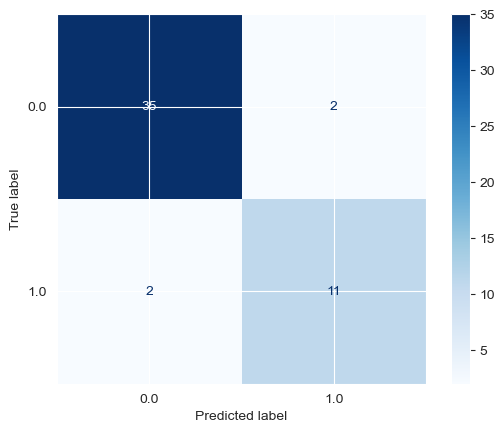

In [69]:
plot_confusion_matrix(LR, X_test, y_test,cmap=plt.cm.Blues);

*The model its able to predict the cells that are malignant and benign*

In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp+fn)
sensitivity

0.8461538461538461

*The confusion matrix show a good result by reaching 84%*